In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Data Set Information:


•	The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.

•	Acquisition date: January 8, 2015

•	The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.
Attribute Information:

•	Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)


Column Names	description
0. url: 	URL of the article (non-predictive)
1. timedelta: 	Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: 	 Number of words in the title
3. n_tokens_content:	Number of words in the content
4. n_unique_tokens:	Rate of unique words in the content
5. n_non_stop_words: 	 Rate of non-stop words in the content
6. n_non_stop_unique_tokens:	Rate of unique non-stop words in the content
7. num_hrefs: 	 Number of links
8. num_self_hrefs: 	 Number of links to other articles published by Mashable
9. num_imgs: 	Number of images
10. num_videos:	 Number of videos
11. average_token_length:	 Average length of the words in the content
12. num_keywords:	 Number of keywords in the metadata
13. data_channel_is_lifestyle: 	Is data channel 'Lifestyle'?
14. data_channel_is_entertainment:	 Is data channel 'Entertainment'?
15. data_channel_is_bus:	 Is data channel 'Business'?
16. data_channel_is_socmed: 	Is data channel 'Social Media'?
17. data_channel_is_tech:	 Is data channel 'Tech'?
18. data_channel_is_world: 	Is data channel 'World'?
19. kw_min_min: 	Worst keyword (min. shares)
20. kw_max_min: 	Worst keyword (max. shares)
21. kw_avg_min: 	Worst keyword (avg. shares)
22. kw_min_max: 	Best keyword (min. shares)
23. kw_max_max: 	Best keyword (max. shares)
24. kw_avg_max:	 Best keyword (avg. shares)
25. kw_min_avg:	 Avg. keyword (min. shares)
26. kw_max_avg:	 Avg. keyword (max. shares)
27. kw_avg_avg: 	Avg. keyword (avg. shares)
28. self_reference_min_shares:	 Min. shares of referenced articles in Mashable
29. self_reference_max_shares: 	Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: 	Avg. shares of referenced articles in Mashable
31. weekday_is_monday: 	Was the article published on a Monday?
32. weekday_is_tuesday: 	Was the article published on a Tuesday?
33. weekday_is_wednesday: 	Was the article published on a Wednesday?
34. weekday_is_thursday:	 Was the article published on a Thursday?
35. weekday_is_friday: 	Was the article published on a Friday?
36. weekday_is_saturday: 	Was the article published on a Saturday?
37. weekday_is_sunday: 	Was the article published on a Sunday?
38. is_weekend:	 Was the article published on the weekend?
39. LDA_00:	 Closeness to LDA topic 0
40. LDA_01:	 Closeness to LDA topic 1
41. LDA_02: 	Closeness to LDA topic 2
42. LDA_03:	 Closeness to LDA topic 3
43. LDA_04: 	Closeness to LDA topic 4
44. global_subjectivity: 	Text subjectivity
45. global_sentiment_polarity: 	Text sentiment polarity
46. global_rate_positive_words:	 Rate of positive words in the content
47. global_rate_negative_words: 	Rate of negative words in the content
48. rate_positive_words:	 Rate of positive words among non-neutral tokens
49. rate_negative_words: 	Rate of negative words among non-neutral tokens
50. avg_positive_polarity:	 Avg. polarity of positive words
51. min_positive_polarity:	 Min. polarity of positive words
52. max_positive_polarity:	 Max. polarity of positive words
53. avg_negative_polarity: 	Avg. polarity of negative words
54. min_negative_polarity: 	Min. polarity of negative words
55. max_negative_polarity: 	Max. polarity of negative words
56. title_subjectivity: Title subjectivity	Title subjectivity
57. title_sentiment_polarity:	 Title polarity
58. abs_title_subjectivity:	 Absolute subjectivity level
59. abs_title_sentiment_polarity: 	Absolute polarity level
60. shares:	 Number of shares (target)


# Data Ingestion

In [476]:
data=pd.read_csv("G:\Datasets\Project\OnlineNewsPopularity.csv")
data.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,

# Describtive analyis

In [477]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [478]:
data[data[" n_tokens_content"]==0].shape

(1181, 61)

In [479]:
data.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [480]:
data.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [481]:
df=data.drop(["url"," timedelta"],axis=1)

In [482]:
data=data.drop(["url"," timedelta"],axis=1)

In [483]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [484]:
data[" n_tokens_title"].nunique()

20

# Binning the targer variable into Popular and Unpopular , please note that this binning is done on the basis of median i.e 1400 in our case, below 1400 we will classify them into 0 (unpopular) and above that they are 1 (Popular)

In [485]:
bins = [0,1400,843300]
df["Shares_Category"] = pd.cut(df[" shares"],bins,labels=[0,1])

In [486]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Shares_Category
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


# Droping off the original shares column

In [487]:
df.drop([" shares"],axis=1,inplace=True)

In [488]:
from tabulate import tabulate

In [489]:
from scipy.stats import mstats

In [490]:
y=df["Shares_Category"]

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Now lets first create a base model without any EDA, also we wont be dealing with any sort of outliers for our base model and would be including every feature except the ones that are row specifics such as url and timedelta

# Base Model using Logistic Regression

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
dataset=df.copy()

In [493]:
x=dataset.drop(["Shares_Category"],axis=1)
y=dataset.Shares_Category

## Lets also try to scale our dataset using Standard Scaler

In [494]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [495]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=12)

In [496]:
xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
16204,12.0,250.0,0.573840,1.0,0.696552,7.0,0.0,1.0,0.0,4.628000,9.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,512.0,167.375000,0.0,843300.0,173700.000000,0.000000,3420.355865,2314.189128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.022275,0.022224,0.022248,0.022223,0.911030,0.482165,0.131629,0.052000,0.020000,0.722222,0.277778,0.299738,0.062500,0.5,-0.147500,-0.2,-0.10,0.227273,0.068182,0.272727,0.068182
11864,7.0,147.0,0.650350,1.0,0.724490,9.0,1.0,0.0,13.0,5.448980,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,738.0,212.571429,0.0,843300.0,426137.500000,0.000000,7633.170213,4892.926315,4500.0,4500.0,4500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025014,0.025014,0.025001,0.899969,0.025001,0.612088,0.292308,0.054422,0.006803,0.888889,0.111111,0.512500,0.500000,0.6,-0.300000,-0.3,-0.30,0.900000,-0.600000,0.400000,0.600000
30104,11.0,2845.0,0.431358,1.0,0.601227,24.0,10.0,54.0,0.0,4.693146,5.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,493.0,97.800000,44800.0,843300.0,319680.000000,1954.732549,4571.695652,3222.669543,795.0,10600.0,3482.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.261066,0.449374,0.208440,0.040784,0.040336,0.435178,-0.001147,0.031634,0.024253,0.566038,0.433962,0.327514,0.033333,1.0,-0.405060,-1.0,-0.05,0.166667,0.000000,0.333333,0.000000
35898,10.0,155.0,0.668831,1.0,0.692308,10.0,3.0,6.0,0.0,4.748387,10.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,873.0,149.888889,0.0,843300.0,239570.000000,0.000000,5809.900538,3714.587319,26600.0,26600.0,26600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020123,0.397159,0.020034,0.542680,0.020004,0.511905,0.186905,0.058065,0.019355,0.750000,0.250000,0.390741,0.166667,0.5,-0.300000,-0.4,-0.25,0.000000,0.000000,0.500000,0.000000
1765,14.0,864.0,0.477246,1.0,0.706383,10.0,5.0,1.0,0.0,4.420139,9.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,1100.0,568.857143,0.0,69100.0,17177.777778,0.000000,5120.000000,2459.534412,3300.0,3300.0,3300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.023363,0.022234,0.289909,0.288976,0.375518,0.503633,0.148577,0.060185,0.020833,0.742857,0.257143,0.413700,0.033333,1.0,-0.399074,-1.0,-0.05,0.650000,0.050000,0.150000,0.050000


In [497]:
scaled_xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [498]:
scaled_xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.758383,-0.632905,0.004264,-0.001303,0.000007,-0.342862,-0.853254,-0.427526,-0.302164,0.095341,0.928614,-0.235061,-0.465201,-0.434679,-0.247357,2.091100,-0.521482,-0.317503,-0.170854,-0.234474,-0.229826,0.426254,-0.629732,-0.981176,-0.371378,-0.623374,-0.219853,-0.257052,-0.279036,-0.450632,-0.479184,-0.477478,-0.47594,-0.409132,3.921906,-0.273706,2.578535,-0.618141,-0.538805,-0.686139,-0.682787,2.334709,0.332335,0.122634,0.714529,0.313673,0.210232,-0.066425,-0.525759,-0.464741,-1.043676,0.876943,1.109860,0.078238,-0.174691,-0.019294,-0.362699,-0.393517
1,-1.610978,-0.851503,0.022450,-0.001303,0.007169,-0.166876,-0.594441,-0.548262,2.788884,1.074788,0.405820,-0.235061,-0.465201,-0.434679,-0.247357,-0.478217,-0.521482,-0.317503,-0.109629,-0.160806,-0.229826,0.426254,1.234887,-0.981176,0.334478,1.343347,0.036968,-0.142253,-0.076801,-0.450632,-0.479184,2.094339,-0.47594,-0.409132,-0.254978,-0.273706,-0.387817,-0.607780,-0.526031,-0.676370,2.288164,-0.724300,1.450747,1.779237,0.854340,-0.911211,1.088880,-1.134575,1.513736,5.668349,-0.639849,-0.317790,0.765622,-2.012285,1.896474,-2.524444,0.310992,1.946089
2,0.284511,4.874509,-0.029603,-0.001303,-0.024429,1.153018,1.734880,5.971467,-0.302164,0.173061,-1.162562,-0.235061,2.149610,-0.434679,-0.247357,-0.478217,-0.521482,-0.389292,-0.176001,-0.347876,0.508680,0.426254,0.448543,0.738923,-0.178471,0.069495,-0.174482,0.013363,-0.122528,-0.450632,-0.479184,-0.477478,-0.47594,2.444200,-0.254978,-0.273706,-0.387817,0.284881,1.417047,-0.025390,-0.619963,-0.671356,-0.072149,-1.246289,-0.461200,0.708416,-0.613154,0.934546,-0.259504,-0.873614,0.975459,-1.140864,-1.644046,0.600869,-0.361282,-0.274922,-0.041894,-0.693467
3,-0.189361,-0.834525,0.026843,-0.001303,-0.001081,-0.078883,-0.076814,0.176152,-0.302164,0.238965,1.451408,-0.235061,-0.465201,-0.434679,-0.247357,-0.478217,-0.521482,-0.389292,-0.073057,-0.262975,-0.229826,0.426254,-0.143186,-0.981176,0.028990,0.444665,1.298248,0.421538,0.916398,-0.450632,-0.479184,-0.477478,-0.47594,2.444200,-0.254978,-0.273706,-0.387817,-0.626278,1.177963,-0.693998,1.078828,-0.741550,0.588341,0.692530,1.064641,0.253794,0.356673,-0.244450,0.346577,0.995519,-1.043676,-0.317790,0.421383,-1.489654,-0.874409,-0.274922,0.840321,-0.693467
4,1.706128,0.670198,-0.018696,-0.001303,0.002528,-0.078883,0.440813,-0.427526,-0.302164,-0.152642,0.928614,4.254223,-0.465201,-0.434679,-0.247357,-0.478217,-0.521482,2.740714,-0.011561,0.419916,-0.229826,-3.172656,-1.785876,-0.981176,-0.086603,-0.512524,-0.031518,-0.172866,-0.130730,-0.450632,-0.479184,2.094339,-0.47594,-0.409132,-0.254978,-0.273706,-0.387817,-0.614023,-0.538761,0.263720,0.220106,0.485858,0.517131,0.297371,1.187069,0.391018,0.319017,-0.198672,0.566664,-0.873614,0.975459,-1.093968,-1.644046,0.600869,1.126784,-0.087462,-1.012330,-0.473504


In [499]:
scaled_xtest.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.758383,0.610773,-0.027235,-0.001303,-0.020716,-0.342862,-0.335627,-0.427526,-0.302164,0.133860,-1.162562,-0.235061,-0.465201,2.300547,-0.247357,-0.478217,-0.521482,-0.389292,-0.121820,0.024267,-0.122676,0.426254,0.402156,0.657431,-0.352890,-0.340350,-0.088589,0.069487,0.060270,-0.450632,-0.479184,-0.477478,-0.475940,2.444200,-0.254978,-0.273706,-0.387817,0.206317,-0.457406,0.796474,0.052565,-0.671834,0.343920,-1.102574,-1.251648,0.011697,-0.870403,1.247277,-0.747640,-0.464741,-1.043676,0.304758,0.077145,0.078238,2.204350,-0.274922,0.840321,-0.693467
1,0.758383,1.525492,-0.012804,-0.001303,-0.006089,2.648897,4.064201,0.900567,-0.302164,0.367772,1.451408,-0.235061,-0.465201,-0.434679,-0.247357,-0.478217,-0.521482,2.740714,-0.178439,0.038278,-0.229826,-3.320015,-1.817400,-0.981176,-0.320997,-0.948116,-0.188179,0.827161,-0.050770,-0.450632,-0.479184,-0.477478,-0.475940,-0.409132,-0.254978,3.653560,2.578535,-0.625560,-0.547448,-0.693897,2.353546,-0.741558,1.090611,0.408948,0.173031,0.215512,0.052526,0.125294,2.064032,0.060952,0.975459,-0.731268,-1.644046,0.600869,1.434660,-0.649842,-0.483001,-0.253541
2,-1.137106,-0.675351,0.012776,-0.001303,0.021436,-0.518847,-0.335627,-0.427526,-0.302164,0.430217,-1.162562,-0.235061,-0.465201,-0.434679,-0.247357,-0.478217,1.917610,-0.389292,-0.170041,-0.300282,-0.071574,0.426254,-0.325705,0.350186,-0.344576,-0.526973,-0.193715,1.184314,1.000842,-0.450632,-0.479184,-0.477478,2.101103,-0.409132,-0.254978,-0.273706,-0.387817,0.199859,-0.457409,1.510640,-0.622614,-0.672037,0.389510,-2.089419,-1.283474,1.685698,-1.839945,2.425925,-0.972579,-0.464741,-1.548460,-0.339552,0.077145,0.078238,1.178097,-1.524656,-0.924109,0.772953
3,0.758383,-0.367615,-0.005943,-0.001303,-0.016350,-0.254869,-0.335627,-0.306791,-0.302164,0.014215,1.451408,-0.235061,2.149610,-0.434679,-0.247357,-0.478217,-0.521482,-0.389292,-0.112338,-0.282557,-0.229826,0.426254,0.532453,-0.981176,0.053213,0.113941,-0.170373,-0.231541,-0.237083,2.219104,-0.479184,-0.477478,-0.475940,-0.409132,-0.254978,-0.273706,-0.387817,-0.626735,-0.547687,-0.369845,2.045704,-0.741564,-0.080435,-0.258919,-1.671695,-1.295093,0.620268,-0.564895,-0.916948,0.060952,-1.447503,0.813834,1.262855,-0.502463,-0.874409,-0.274922,0.840321,-0.693467
4,-0.189361,-0.463119,0.010189,-0.001303,0.013709,-0.430854,-0.076814,-0.306791,-0.302164,0.405382,-1.685356,-0.235061,-0.465201,2.300547,-0.247357,-0.478217,-0.521482,-0.389292,-0.229369,-0.387891,0.085028,0.426254,1.037391,0.747550,-0.365225,-0.314200,-0.151368,-0.180519,-0.184659,-0.450632,-0.479184,-0.477478,2.101103,-0.409132,-0.254978,-0.273706,-0.387817,2.322914,-0.411624,-0.587639,-0.588764,-0.637991,-0.839788,-0.157652,-0.887950,-0.136331,-0.353003,0.618287,0.809779,-0.464741,0.975459,1.111040,1.109860,0.600869,-0.874409,-0.274922,0.840321,-0.693467


In [500]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [501]:
y_lr=lr.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [502]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [503]:
classificationreport = classification_report(ytest,y_lr)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      5932
           1       0.66      0.62      0.64      5962

   micro avg       0.65      0.65      0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [504]:
accuracy_score(ytest,y_lr)

0.645367412140575

In [505]:
cohen_kappa_score(ytest,y_lr)

0.29083438110850757

In [506]:
explained_variance_score(ytest,y_lr)

-0.41515437283962786

# The main inference that can be drawned from our base model is that our model is acheiving lower precision as well as lower f1 score,similiarly accuracy is low at 64 percent with cohen kappa score at around 30 percent, hence would need to perform adequate EDA and deal with outliers if any

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

********************************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************************

# ********EDA********

# To ease our Univariate and Bivariate analysis and also the Outlier detection process and getting inferences from visuals we will be using a cutom function that can be applied to all the columns and will give the results according to each column type

In [507]:
def eda(col):
    print("_____________________________________________________________________________________________________________________________________________________________________________________________________________________")
    print()
    print()
    print("************************************Univariate Analysis**************************************************")
    print()
    print()
    print(col.describe())
    print()
    print()
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.boxplot(col)
    plt.subplot(132)    
    sns.distplot(col)    
    plt.subplot(133)
    sns.violinplot(x = col)
    plt.show()
    print()
    print()
    IQR=col.quantile(0.75)-col.quantile(0.25)
    out_left_limit=col.quantile(0.25)-1.5*IQR
    out_right_limit=col.quantile(0.75)+1.5*IQR
    print("Total no. of entries : ",len(col))
    print()
    print("The value for left whisker = ",out_left_limit)
    print()
    print("Datapoints before left whisker : ")
    print((col<out_left_limit).value_counts())
    print()
    print("The value for right whisker = ",out_right_limit)
    print()
    print("Datapoints before right whisker : ")
    print((col>out_right_limit).value_counts())
    print()
    print()
    print()
    print()
    print("************************************Bivariate Analysis**************************************************")
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.scatterplot(x=col,y=y)
    if col.nunique()<=24:
        plt.subplot(132)
        sns.countplot(col)
        plt.subplot(133)
        sns.boxplot(col,y)
        print(pd.DataFrame(col.value_counts().head()))
        print()
        print()        
    plt.show()
    temp=col.corr(y)
    print()
    print()
    print("The Corelation between Target Column and Input Column is : ",temp)
    print()
    print()

 
    
    

# Loop to initialize function to all columns

In [ ]:
df.apply(eda)

# As We can clearly see the main problem in this dataset is presence of outliers , the data is highly skewed in some columns while some categorical columns are unbalance, this problem needs to be corrected and also lets try to check for corelation of features with each other

# Checking Correlation

## For this we would be defining a function that will make tables coantaining name of columns according to their co relation with each other

In [508]:
corr_9_up=[]
corr_7_to_9=[]
corr_5_to_7=[]
corr_3_to_5=[]
corr_3_less=[]
for i in df.columns:
    for j in df.columns:
        p=abs(df[i].corr(df[j]))
        if p>=0.9:
            corr_9_up.append([i,j,p])
        elif p>=0.7:
            corr_7_to_9.append([i,j,p])        
        elif p>=0.5:
            corr_5_to_7.append([i,j,p])
        elif p>=0.3:
            corr_3_to_5.append([i,j,p])
        else:
            corr_3_less.append([i,j,p])
            

In [509]:
names=["Column 1","Column 2","corelation"]
corr_3_less=pd.DataFrame(corr_3_less,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_3_less.drop("index",axis=1,inplace=True)
corr_3_to_5=pd.DataFrame(corr_3_to_5,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_3_to_5.drop("index",axis=1,inplace=True)
corr_7_to_9=pd.DataFrame(corr_7_to_9,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_7_to_9.drop("index",axis=1,inplace=True)
corr_9_up=pd.DataFrame(corr_9_up,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_9_up.drop("index",axis=1,inplace=True)

In [510]:
corr_9_up

,Column 1,Column 2,corelation
0,Shares_Category,Shares_Category,1.000000
1,avg_negative_polarity,avg_negative_polarity,1.000000
2,kw_max_max,kw_max_max,1.000000
3,kw_avg_max,kw_avg_max,1.000000
4,kw_max_avg,kw_max_avg,1.000000
5,n_tokens_content,n_tokens_content,1.000000
6,self_reference_min_shares,self_reference_min_shares,1.000000
7,avg_positive_polarity,avg_positive_polarity,1.000000
8,self_reference_avg_sharess,self_reference_avg_sharess,1.000000
9,weekday_is_monday,weekday_is_monday,1.000000


## Inferences : There are two columns that have very high correlation with each other and thus needs to be dropped

## names of these columns are : [kw_max_min with kw_avg_min],[n_non_stop_unique_tokens with n_non_stop_words],[n_unique_tokens	with n_non_stop_words]

In [511]:
y.corr(df[" n_unique_tokens"])

0.0032256827738335997

In [512]:
df.drop([" kw_max_min"," n_non_stop_words"],axis=1,inplace=True)

In [513]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares_Category
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


#########################################################################################################################################################################################

#########################################################################################################################################################################################

# Outliers Treatment :

## Now as presence of outliers is the major problem in our dataset plus due to large no. of columns it wont be possible now to devote time for each column treatment using transformation or some other techique , so i am thing of capping all of them with a suitable value i.e upper limit value for right outliers and lower limit value for left outliers with the help of winsorization

## Also i am also be doing outlier treatment only on those columns that have continuous values

In [514]:
# making a copy again to save the progress
from scipy.stats import mstats

cf=df.copy()

In [515]:
cf.shape

(39644, 57)

### defining a function to make all outliers UL | DL

def WinsorizeCustom3(col):
    if (col.nunique()>2):
        IQR=col.quantile(0.75)-col.quantile(0.25)
        UL=col.quantile(0.75)+1.5*IQR
        DL=col.quantile(0.25)-1.5*IQR
        col = np.where(col.values <= DL,DL,np.where(col.values >= UL, UL, col))

def out_null(col):
    if (col.nunique()>2):
        IQR=col.quantile(0.75)-col.quantile(0.25)
        UL=col.quantile(0.75)+1.5*IQR
        DL=col.quantile(0.25)-1.5*IQR
        col=np.where (col>UL,UL,col)
        col=np.where (col<DL,DL,col)


# Making all outliers null

In [516]:
def out_null(col):
    if (col.nunique()>2):
        IQR=col.quantile(0.75)-col.quantile(0.25)
        UL=col.quantile(0.75)+1.5*IQR
        DL=col.quantile(0.25)-1.5*IQR
        col.where(col.between(DL,UL),np.nan,inplace=True)


### Applying function only on continous columns

In [517]:
# I am also going to exclude several other columns those show probabilty scores such as LDA columns,ploarity columns,etc

In [518]:
for i in df.drop([" LDA_00"," LDA_01"," LDA_02"," LDA_03"," LDA_04",' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],axis=1).columns:
    out_null(df[i])

In [519]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares_Category
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,0.540890,19.0,NaN,NaN,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [520]:
df.shape

(39644, 57)

In [521]:
df.isnull().sum()

 n_tokens_title                    156
 n_tokens_content                 1933
 n_unique_tokens                  1604
 n_non_stop_unique_tokens         1733
 num_hrefs                        2169
 num_self_hrefs                   2090
 num_imgs                         7703
 num_videos                       2946
 average_token_length             1681
 num_keywords                       51
 data_channel_is_lifestyle           0
 data_channel_is_entertainment       0
 data_channel_is_bus                 0
 data_channel_is_socmed              0
 data_channel_is_tech                0
 data_channel_is_world               0
 kw_min_min                       4677
 kw_avg_min                       2081
 kw_min_max                       5063
 kw_max_max                       9440
 kw_avg_max                        960
 kw_min_avg                          0
 kw_max_avg                       2391
 kw_avg_avg                       1629
 self_reference_min_shares        4976
 self_reference_max_share

# Droping off all outliers

In [522]:
df.dropna(inplace=True)

In [523]:
df.shape

(12863, 57)

In [524]:
from sklearn.model_selection import train_test_split

In [525]:
x=df.drop(["Shares_Category"],axis=1)
y=df.Shares_Category

## Lets also try to scale our dataset using Standard Scaler

In [526]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [527]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=12)

In [528]:
xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
11530,9.0,209.0,0.728155,0.886364,6.0,2.0,0.0,2.0,4.602871,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,264.857143,4500.0,843300.0,496485.714286,1968.000000,5132.308728,3868.238903,3400.0,3400.0,3400.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028599,0.201628,0.028572,0.712349,0.028852,0.394539,0.153855,0.057416,0.009569,0.857143,0.142857,0.324008,0.100000,0.5,-0.300000,-0.4,-0.20,0.000000,0.000,0.500000,0.000
15614,8.0,1163.0,0.419327,0.625000,8.0,0.0,1.0,0.0,4.519347,8.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,241.000000,2100.0,843300.0,308837.500000,1499.625000,3871.707602,2827.327756,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651728,0.148403,0.149868,0.025000,0.025000,0.502177,0.203931,0.058469,0.018057,0.764045,0.235955,0.422525,0.062500,1.0,-0.211772,-0.7,-0.05,0.000000,0.000,0.500000,0.000
17999,9.0,154.0,0.688312,0.778846,5.0,1.0,1.0,0.0,5.032468,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,128.798571,19500.0,843300.0,201200.000000,1936.646018,9147.995543,3856.090544,2700.0,2700.0,2700.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028850,0.028657,0.028643,0.313771,0.600080,0.460000,0.240000,0.045455,0.006494,0.875000,0.125000,0.357143,0.100000,0.6,-0.100000,-0.1,-0.10,0.000000,0.000,0.500000,0.000
30107,16.0,890.0,0.438997,0.601504,4.0,1.0,1.0,0.0,4.719101,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,168.500000,1600.0,843300.0,279516.666667,1089.000000,3509.966071,2174.718524,1000.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.033334,0.033333,0.866664,0.033333,0.033336,0.410058,0.072995,0.032584,0.021348,0.604167,0.395833,0.370293,0.100000,0.6,-0.294591,-0.8,-0.10,0.166667,0.125,0.333333,0.125
19637,11.0,320.0,0.580952,0.721649,0.0,0.0,2.0,0.0,4.584375,6.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,119.666667,15800.0,843300.0,292333.333333,1938.239726,4824.418803,3235.606668,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034022,0.034899,0.220693,0.515999,0.194387,0.484641,0.200126,0.046875,0.009375,0.833333,0.166667,0.386876,0.136364,1.0,-0.400000,-0.4,-0.40,1.000000,-0.500,0.500000,0.500


In [529]:
scaled_xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [530]:
scaled_xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.797733,-0.942526,2.014404,2.172311,-0.398183,-0.314968,-1.026477,2.705120,-0.351992,-0.158669,-0.206428,-0.418326,-0.506794,-0.21135,-0.498472,-0.690326,1.751766,0.367938,0.331424,0.0,2.541586,1.238769,0.563925,1.903796,1.652347,0.100168,0.689546,-0.457960,-0.479640,2.033079,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,-0.634370,0.302183,-0.833518,2.988585,-0.765225,-0.542929,0.461955,1.174065,-0.734099,1.048173,-1.048173,-0.323039,0.032270,-1.153945,-0.374202,0.407249,-1.007745,-0.843535,-0.223292,0.838687,-0.664188
1,-1.284108,2.353334,-1.561643,-1.104438,-0.006546,-1.315662,-0.329674,-0.610323,-0.674851,0.390815,-0.206428,-0.418326,1.973190,-0.21135,-0.498472,-0.690326,1.751766,0.177954,-0.200930,0.0,0.473469,0.722745,-0.425261,0.231327,-1.120223,-0.886081,-1.117163,2.183597,-0.479640,-0.491865,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,1.595079,0.058796,-0.448638,-0.459998,-0.778518,0.748740,1.017737,1.240823,0.154412,0.440471,-0.440471,0.895083,-0.531273,1.244609,0.380817,-0.688481,0.663253,-0.843535,-0.223292,0.838687,-0.664188
2,-0.797733,-1.132539,1.553039,0.824351,-0.594001,-0.815315,-0.329674,-0.610323,1.308593,-0.158669,-0.206428,-0.418326,-0.506794,-0.21135,2.006129,-0.690326,-0.570852,-0.715554,3.658638,0.0,-0.712831,1.204225,3.715011,1.884277,1.081524,-0.102883,0.317576,-0.457960,2.084896,-0.491865,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,-0.633472,-0.488790,-0.833295,0.988829,1.205933,0.242610,1.418053,0.415858,-1.056100,1.164737,-1.164737,0.086660,0.032270,-0.674234,1.337324,1.502978,0.106254,-0.843535,-0.223292,0.838687,-0.664188
3,2.606892,1.410179,-1.333881,-1.399014,-0.789819,-0.815315,-0.329674,-0.610323,0.097291,-0.708153,-0.206428,-0.418326,-0.506794,-0.21135,-0.498472,1.448591,-0.570852,-0.399394,-0.311837,0.0,0.150317,0.270347,-0.709118,-0.817243,-0.304761,-0.596008,-0.585778,-0.457960,-0.479640,-0.491865,-0.482616,-0.410045,4.228039,-0.250339,2.816476,-0.617430,-0.467404,1.825818,-0.418188,-0.749755,-0.356693,-0.435484,-0.399939,0.498993,-0.603145,0.603145,0.249260,0.032270,-0.674234,-0.327911,-1.053724,0.106254,-0.300769,0.298845,-0.043767,-0.052439
4,0.175017,-0.559045,0.309882,0.107269,-1.573092,-1.315662,0.367130,-0.610323,-0.423486,-0.708153,-0.206428,2.390480,-0.506794,-0.21135,-0.498472,-0.690326,-0.570852,-0.788275,2.837925,0.0,0.291572,1.205981,0.322326,0.887323,-1.120223,-0.886081,-1.117163,-0.457960,-0.479640,-0.491865,2.072042,-0.410045,-0.236516,-0.250339,-0.355054,-0.614966,-0.460246,-0.223904,2.003456,-0.194008,0.538300,0.975499,0.505895,-0.754448,0.892755,-0.892755,0.454296,0.578736,1.244609,-1.229965,0.407249,-3.235743,2.413064,-2.311843,0.838687,1.782809


In [531]:
scaled_xtest.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.175017,-1.149813,1.665068,1.196258,-0.398183,0.185380,-1.026477,-0.610323,-0.191867,1.489783,-0.206428,-0.418326,-0.506794,-0.21135,2.006129,-0.690326,1.751766,1.559607,-0.223112,0.0,-0.361473,0.906781,-0.176455,0.615604,-0.595881,-0.699564,-0.775482,-0.457960,-0.479640,-0.491865,-0.482616,-0.410045,4.228039,-0.250339,2.816476,0.072137,-0.181449,-0.859485,-0.485000,1.335615,0.710232,1.607435,2.214182,-1.033289,1.436719,-1.436719,0.679463,0.032270,0.285187,-1.229965,0.407249,-3.235743,-0.843535,-0.223292,0.838687,-0.664188
1,1.147767,-0.890704,0.184632,0.228801,-0.202364,2.186769,-0.329674,1.047399,-0.404504,1.489783,-0.206428,-0.418326,-0.506794,-0.21135,2.006129,-0.690326,-0.570852,2.328078,-0.334019,0.0,0.487714,0.723158,-0.403060,0.227041,-0.223215,-0.334942,-0.227093,-0.457960,2.084896,-0.491865,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,-0.665103,0.382616,-0.860702,0.007043,1.283924,-0.666142,0.948161,0.364408,-1.268532,1.387268,-1.387268,-0.018519,0.032270,-1.153945,1.581828,1.607333,0.424539,1.761744,1.447548,-0.220258,1.293409
2,-0.311358,-0.586684,-0.293477,-0.254783,-0.594001,0.185380,-0.329674,-0.610323,-0.848748,-0.708153,-0.206428,2.390480,-0.506794,-0.21135,-0.498472,-0.690326,1.751766,-0.920998,2.660474,0.0,0.823531,1.021038,-0.050690,0.323913,-0.332487,-0.603550,-0.601719,-0.457960,-0.479640,2.033079,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,0.027027,2.516486,-0.818399,-0.414864,-0.749692,0.284117,0.815072,0.582080,-1.064815,1.212734,-1.212734,0.170161,0.578736,-0.674234,0.410248,0.955114,-0.636412,-0.843535,-0.223292,0.838687,-0.664188
3,1.147767,1.192528,-0.869328,-0.573477,0.385090,0.685727,-0.329674,1.047399,0.664270,-0.708153,-0.206428,-0.418326,-0.506794,-0.21135,-0.498472,1.448591,-0.570852,0.036205,-0.666740,0.0,-0.783183,-0.929440,-0.690819,-0.614074,-0.559185,-0.392956,-0.482689,-0.457960,-0.479640,2.033079,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,-0.617426,-0.467398,1.267249,-0.418185,-0.142321,-1.375648,-1.458194,-1.468933,0.795829,-1.975418,1.975418,-0.302847,0.032270,-0.674234,0.235529,-1.784210,0.663253,-0.517875,-0.641002,0.309215,-0.174788
4,1.147767,-0.230841,-0.655603,-0.652000,-1.181455,-0.314968,1.063933,-0.610323,1.406635,-0.708153,-0.206428,-0.418326,-0.506794,-0.21135,-0.498472,1.448591,-0.570852,-0.817474,-0.666740,0.0,-0.540532,-0.929440,-0.422758,-0.258725,-0.304761,-0.596008,-0.585778,2.183597,-0.479640,-0.491865,-0.482616,-0.410045,-0.236516,-0.250339,-0.355054,-0.617367,2.575412,-0.288502,-0.416637,-0.747698,-0.852509,-0.361847,-0.021527,-0.222345,0.200438,-0.200438,0.565051,0.032270,1.244609,-1.158651,-1.327656,0.106254,2.413064,-2.729553,0.838687,2.272208


## Modeling

In [532]:
def quick_eval(pipeline, scaled_xtrain, ytrain, scaled_xtest, ytest, verbose=True):
   
    pipeline.fit(scaled_xtrain, ytrain)
    y_test_pred = pipeline.predict(scaled_xtest)
    
    acc = accuracy_score(ytest,y_test_pred)
    cohen_score = cohen_kappa_score(ytest,y_test_pred)
    
    if verbose:
        print("----------------------------------------------------------------------------------")
        print(f"Classifier algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
        print()
        print(f"Accuracy Score : {acc}")
        print(f"CohenKappa Score : {cohen_score}")
        print()
    
    return pipeline.named_steps['regressor'], acc, cohen_score
    
regressors = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LGBMClassifier(lambda_l1=10),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(lambda_l1=10)
    
]

for r in regressors:
    pipe = Pipeline(steps = [
        ('regressor', r)
    ])

    quick_eval(pipe, scaled_xtrain, ytrain, scaled_xtest, ytest)


----------------------------------------------------------------------------------
Classifier algorithm: LogisticRegression

Accuracy Score : 0.687483804094325
CohenKappa Score : 0.2951747617367283

----------------------------------------------------------------------------------
Classifier algorithm: DecisionTreeClassifier

Accuracy Score : 0.6035242290748899
CohenKappa Score : 0.1656112451919558

----------------------------------------------------------------------------------
Classifier algorithm: RandomForestClassifier

Accuracy Score : 0.6724540036278829
CohenKappa Score : 0.2510351329481365

----------------------------------------------------------------------------------
Classifier algorithm: LGBMClassifier

Accuracy Score : 0.693962166364343
CohenKappa Score : 0.3210209746265523

----------------------------------------------------------------------------------
Classifier algorithm: AdaBoostClassifier

Accuracy Score : 0.6841150557139155
CohenKappa Score : 0.2967141217936019

# The Ensemble techniques so far worked better than others , espically XGBoost , the highest accuracy observed so far is around 69% with it along with improvement in cohen Kappa score to 30% 

#########################################################################################################################################################################################

# Lets try out Mice to predict the values of outliers and then again check for our accuracies

## Filling Outliers with MICE

In [398]:
# We have made a copy of our original dataset beforing any outlier treatments, so we gonna be using it here

In [399]:
for i in cf.drop([" LDA_00"," LDA_01"," LDA_02"," LDA_03"," LDA_04",' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],axis=1).columns:
    out_null(cf[i])

In [400]:
cf.isnull().sum()

 n_tokens_title                    156
 n_tokens_content                 1933
 n_unique_tokens                  1604
 n_non_stop_unique_tokens         1733
 num_hrefs                        2169
 num_self_hrefs                   2090
 num_imgs                         7703
 num_videos                       2946
 average_token_length             1681
 num_keywords                       51
 data_channel_is_lifestyle           0
 data_channel_is_entertainment       0
 data_channel_is_bus                 0
 data_channel_is_socmed              0
 data_channel_is_tech                0
 data_channel_is_world               0
 kw_min_min                       4677
 kw_avg_min                       2081
 kw_min_max                       5063
 kw_max_max                       9440
 kw_avg_max                        960
 kw_min_avg                          0
 kw_max_avg                       2391
 kw_avg_avg                       1629
 self_reference_min_shares        4976
 self_reference_max_share

In [401]:
# As mice will take time so i am going to do in side ways in seperate notebook and will import result here after through csv, also i am going to use the dataset
# before bining the target variable , as mice seems to work more accurately on regression problem.
from impyute import mice

In [402]:
df.to_csv("withnull.csv",header=False)

# The code to run mice is below , i have marked it as a comment because it will take long time to complete

In [403]:
# after_mice=mice(cf)

In [404]:
# Reading the file after imputation

In [405]:
after_mice=pd.read_csv("prj_mice.csv")
after_mice.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0,1.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.000000,1.00000,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,781.382463,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
1,1,2.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.000000,1.00000,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,879.142892,918.000000,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
2,2,3.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.000000,1.00000,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,849.239803,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
3,3,4.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,10.366036,2.74526,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,893.415065,545.000000,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
4,4,5.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.000000,0.00000,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,946.248381,6109.426121,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855.0


In [406]:
after_mice.drop(["Unnamed: 0","0"],axis=1,inplace=True)

In [407]:
after_mice.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.000000,1.00000,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,781.382463,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
1,9.0,211.0,0.575130,1.0,0.663866,3.0,1.000000,1.00000,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,879.142892,918.000000,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
2,9.0,531.0,0.503788,1.0,0.665635,9.0,0.000000,1.00000,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,849.239803,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
3,13.0,1072.0,0.415646,1.0,0.540890,19.0,10.366036,2.74526,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,893.415065,545.000000,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
4,10.0,370.0,0.559889,1.0,0.698198,2.0,2.000000,0.00000,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,946.248381,6109.426121,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855.0


In [408]:
after_mice.shape

(39642, 59)

In [409]:
list(data.columns)

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 

In [410]:
after_mice.columns=list(data.columns)

In [411]:
after_mice.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.000000,1.00000,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,781.382463,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
1,9.0,211.0,0.575130,1.0,0.663866,3.0,1.000000,1.00000,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,879.142892,918.000000,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
2,9.0,531.0,0.503788,1.0,0.665635,9.0,0.000000,1.00000,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,849.239803,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
3,13.0,1072.0,0.415646,1.0,0.540890,19.0,10.366036,2.74526,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,893.415065,545.000000,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
4,10.0,370.0,0.559889,1.0,0.698198,2.0,2.000000,0.00000,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,946.248381,6109.426121,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855.0


In [412]:
bins = [0,1400,843300]
after_mice["Shares_Category"] = pd.cut(after_mice[" shares"],bins,labels=[0,1])

In [413]:
dff=after_mice.drop(" shares",axis=1)

In [414]:
dff.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares_Category
0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.000000,1.00000,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,781.382463,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
1,9.0,211.0,0.575130,1.0,0.663866,3.0,1.000000,1.00000,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,879.142892,918.000000,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
2,9.0,531.0,0.503788,1.0,0.665635,9.0,0.000000,1.00000,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,849.239803,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
3,13.0,1072.0,0.415646,1.0,0.540890,19.0,10.366036,2.74526,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,893.415065,545.000000,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
4,10.0,370.0,0.559889,1.0,0.698198,2.0,2.000000,0.00000,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,946.248381,6109.426121,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,0


In [415]:
dff.drop([" kw_max_min"," n_non_stop_words"],axis=1,inplace=True)

In [416]:
dff.shape

(39642, 57)

In [417]:
dff.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares_Category
0,9.0,255.0,0.604743,0.791946,3.0,1.000000,1.00000,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,781.382463,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
1,9.0,211.0,0.575130,0.663866,3.0,1.000000,1.00000,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,879.142892,918.000000,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
2,9.0,531.0,0.503788,0.665635,9.0,0.000000,1.00000,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,849.239803,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
3,13.0,1072.0,0.415646,0.540890,19.0,10.366036,2.74526,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,893.415065,545.000000,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
4,10.0,370.0,0.559889,0.698198,2.0,2.000000,0.00000,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,946.248381,6109.426121,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,0


In [418]:
x=dff.drop(["Shares_Category"],axis=1)
y=dff.Shares_Category

## Lets also try to scale our dataset using Standard Scaler

In [419]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [420]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=12)

In [421]:
xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
11824,10.0,904.0,0.447727,0.610169,11.0,8.0,1.0,0.0,4.695796,7.0,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,186.142857,10934.630924,843300.0,296271.428571,2629.891148,6655.906372,4466.572287,754.0,2500.000000,1950.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028717,0.028597,0.028576,0.028702,0.885408,0.417837,0.101334,0.039823,0.018805,0.679245,0.320755,0.361936,0.0625,0.6,-0.271195,-0.8,-0.050,0.000000,0.000000,0.500000,0.000000
1087,12.0,343.0,0.485804,0.629834,5.0,1.0,1.0,0.0,3.918367,7.0,0.0,0.0,0.0,0.0,1.0,0.0,4.952967,411.000000,0.000000,843300.0,21342.857143,0.000000,3320.840000,1787.662510,1600.0,1600.000000,1600.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.233736,0.028613,0.188363,0.028690,0.520599,0.542720,0.314354,0.049563,0.014577,0.772727,0.227273,0.644013,0.0625,1.0,-0.555000,-0.8,-0.125,0.300000,1.000000,0.200000,1.000000
27627,13.0,426.0,0.521327,0.682927,7.0,5.0,1.0,1.0,4.507042,10.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.000000,293.777778,0.000000,843300.0,315880.000000,0.000000,4410.560414,2938.041824,1700.0,5800.000000,3200.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020116,0.120340,0.020041,0.020008,0.819496,0.485611,0.192367,0.042254,0.007042,0.857143,0.142857,0.315248,0.1000,0.6,-0.160185,-0.2,-0.125,0.596429,0.282143,0.096429,0.282143
17952,13.0,248.0,0.635983,0.785714,4.0,4.0,0.0,2.0,4.975806,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,182.431667,1400.000000,843300.0,490250.000000,1172.000000,5737.145970,3611.523080,1200.0,5372.117382,2900.895025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033335,0.033372,0.033335,0.366745,0.533212,0.471880,0.106981,0.028226,0.008065,0.777778,0.222222,0.303247,0.1000,0.8,-0.262500,-0.4,-0.125,1.000000,0.800000,0.500000,0.800000
24574,9.0,566.0,0.500914,0.662614,7.0,1.0,1.0,0.0,4.471731,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,260.431667,1800.000000,843300.0,378366.666667,1450.000000,3587.324186,2615.032928,1500.0,1500.000000,1500.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.213194,0.033340,0.200717,0.033335,0.519414,0.453831,0.043355,0.026502,0.022968,0.535714,0.464286,0.388286,0.0500,0.9,-0.301282,-0.6,-0.050,1.000000,-0.500000,0.500000,0.500000


In [422]:
scaled_xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [423]:
scaled_xtrain.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.186142,1.256077,-1.019649,-0.914323,0.265236,2.574921,-0.337832,-0.677211,0.087019,-0.120536,-0.239219,-0.465841,-0.435450,-0.250545,2.099047,-0.518195,1.103058,-0.445098,1.341496,0.0,0.335778,1.331584,0.995484,1.562739,-0.575645,-0.393157,-0.344920,-0.451510,-0.478455,2.084610,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.596445,-0.511630,-0.663162,-0.657552,2.247277,-0.222501,-0.187228,0.005784,0.202217,-0.020745,0.213628,0.077846,-0.460859,-0.636469,-0.090905,-0.952654,0.607864,-0.868175,-0.265568,0.836548,-0.687150
1,0.783751,-0.477965,-0.650526,-0.713444,-0.655211,-0.865815,-0.337832,-0.677211,-2.906864,-0.120536,-0.239219,-0.465841,-0.435450,-0.250545,2.099047,-0.518195,1.474365,1.131825,-0.786938,0.0,-1.874560,-0.984699,-0.931643,-1.362104,-0.043492,-0.588656,-0.475947,-0.451510,-0.478455,-0.479706,-0.474869,2.450623,-0.254983,-0.27333,-0.387518,0.179159,-0.511561,-0.096975,-0.657596,0.988213,0.853837,2.021522,0.565941,-0.188813,0.473997,-0.388212,2.787946,-0.460859,0.983787,-2.320627,-0.952654,-0.185859,0.059312,3.494349,-0.753065,3.722045
2,1.268698,-0.221414,-0.306168,-0.171095,-0.348395,1.100320,-0.337832,1.052055,-0.639874,1.456610,-0.239219,-0.465841,-0.435450,-0.250545,2.099047,-0.518195,-0.845106,0.309746,-0.786938,0.0,0.493424,-0.984699,-0.301961,-0.106116,0.019410,0.323671,0.121666,-0.451510,2.090060,-0.479706,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.628983,-0.094980,-0.693404,-0.687071,2.019794,0.361631,0.756667,0.145570,-0.885686,0.920756,-0.931682,-0.370720,0.066591,-0.636469,0.781248,1.110507,-0.185859,0.975758,0.795266,-1.301860,0.556873
3,1.268698,-0.771609,0.805318,0.878895,-0.808618,0.608786,-1.015027,2.781320,1.165339,-0.646251,-0.239219,-0.465841,-0.435450,-0.250545,-0.476407,-0.518195,-0.845106,-0.471124,-0.514427,0.0,1.895303,0.047543,0.464590,0.629193,-0.295101,0.230726,0.009948,2.214791,-0.478455,-0.479706,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.578974,-0.489945,-0.646298,0.490195,1.031746,0.243279,-0.128679,-0.661204,-0.791143,0.500726,-0.420727,-0.486021,0.066591,0.173659,-0.022592,0.422787,-0.185859,2.223448,2.742366,0.836548,2.840206
4,-0.671089,0.211324,-0.504052,-0.378594,-0.348395,-0.865815,-0.337832,-0.677211,-0.775856,-0.646251,-0.239219,-0.465841,2.296475,-0.250545,-0.476407,-0.518195,-0.845106,0.075890,-0.436567,0.0,0.995797,0.292392,-0.777658,-0.458778,-0.106394,-0.610378,-0.513298,-0.451510,-0.478455,-0.479706,-0.474869,2.450623,-0.254983,-0.27333,-0.387518,0.101450,-0.490091,-0.053203,-0.641823,0.984123,0.087723,-0.788395,-0.760359,0.587221,-0.780366,1.137684,0.331005,-0.636676,0.578723,-0.327284,-0.264934,0.607864,2.223448,-2.145527,0.836548,1.517448


In [424]:
scaled_xtest.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-1.640983,1.803182,-0.672505,0.251606,1.799313,1.591854,0.406591,-0.677211,-0.073847,-0.646251,-0.239219,-0.465841,-0.43545,-0.250545,-0.476407,1.929777,-0.845106,-1.450712,-0.786938,0.0,0.155114,-0.984699,-0.780419,-1.218444,2.804034,2.626212,3.221786,-0.45151,2.090060,-0.479706,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.578975,-0.490115,2.306413,-0.641826,-0.693411,0.341791,0.337176,-0.050009,0.259664,-0.087316,0.294609,0.637473,0.066591,0.983787,0.011480,0.078926,0.872439,0.677637,1.614390,-1.812808,1.517448
1,0.298804,1.005707,-0.440389,0.055965,1.799313,-0.865815,0.339364,1.052055,-0.196732,-0.646251,-0.239219,-0.465841,-0.43545,-0.250545,-0.476407,1.929777,-0.845106,-1.228750,-0.786938,0.0,0.442399,-0.984699,0.601906,0.130430,-0.576274,-0.772642,-0.792308,-0.45151,-0.478455,-0.479706,-0.474869,2.450623,-0.254983,-0.27333,-0.387518,-0.578947,0.958775,-0.047674,0.528058,-0.690777,0.940739,0.467420,0.091436,-0.300861,0.383118,-0.277660,0.523800,-0.871098,0.983787,-1.058651,-0.952654,0.381086,-0.868175,-0.265568,0.836548,-0.687150
2,0.298804,-1.093072,0.852449,-0.269769,1.492497,1.100320,3.048146,1.052055,1.338738,-0.120536,-0.239219,-0.465841,-0.43545,-0.250545,-0.476407,-0.518195,-0.845106,-0.471814,-0.786938,0.0,0.901427,-0.984699,0.649933,0.478014,1.277454,0.540892,0.887359,-0.45151,-0.478455,-0.479706,-0.474869,2.450623,-0.254983,-0.27333,-0.387518,-0.053532,-0.511662,-0.082987,1.208285,-0.709724,0.450385,1.611111,0.910608,-0.252477,0.618335,-0.563795,0.500871,0.578058,0.983787,0.075615,0.938577,-1.508730,-0.868175,0.110423,0.836548,-0.246230
3,-1.156036,-0.731426,0.179520,-1.062862,2.259536,1.100320,0.244503,1.052055,1.863455,0.930895,-0.239219,-0.465841,-0.43545,-0.250545,-0.476407,-0.518195,1.103058,-0.851295,0.283641,0.0,1.136759,0.197099,0.668064,0.668878,1.969379,0.562614,1.111464,-0.45151,2.090060,-0.479706,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.621005,-0.539954,-0.252452,1.176808,0.026538,0.188853,0.397714,-0.962416,-0.828292,0.353716,-0.241893,-0.160567,0.066591,0.983787,0.910372,1.153489,0.078716,-0.868175,-0.265568,0.836548,-0.687150
4,0.298804,-0.975614,1.393224,1.042438,0.265236,2.574921,-1.015027,1.052055,0.433293,1.456610,-0.239219,-0.465841,-0.43545,-0.250545,2.099047,-0.518195,1.103058,0.217554,-0.786938,0.0,-0.819214,-0.984699,-0.481415,-0.516522,2.220987,0.475726,1.111464,-0.45151,-0.478455,2.084610,-0.474869,-0.408059,-0.254983,-0.27333,-0.387518,-0.629376,-0.103881,-0.692651,-0.367443,1.701280,0.770012,1.537617,1.823511,-0.520671,0.971160,-0.992997,0.144572,0.578058,-1.041533,0.026512,0.723664,-0.979581,0.537109,0.247148,-1.571957,-0.085896


# Modeling after MICE

### Building a PipeLine

In [425]:
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [426]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [427]:
def quick_eval(pipeline, scaled_xtrain, ytrain, scaled_xtest, ytest, verbose=True):
   
    pipeline.fit(scaled_xtrain, ytrain)
    y_test_pred = pipeline.predict(scaled_xtest)
    
    acc = accuracy_score(ytest,y_test_pred)
    cohen_score = cohen_kappa_score(ytest,y_test_pred)
    
    if verbose:
        print("----------------------------------------------------------------------------------")
        print(f"Classifier algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
        print()
        print(f"Accuracy Score : {acc}")
        print(f"CohenKappa Score : {cohen_score}")
        print()
    
    return pipeline.named_steps['regressor'], acc, cohen_score
    
regressors = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LGBMClassifier(lambda_l1=10),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(lambda_l1=10)
    
]

for r in regressors:
    pipe = Pipeline(steps = [
        ('regressor', r)
    ])

    quick_eval(pipe, scaled_xtrain, ytrain, scaled_xtest, ytest)


----------------------------------------------------------------------------------
Classifier algorithm: LogisticRegression

Accuracy Score : 0.6586227192466156
CohenKappa Score : 0.31492699466785934

----------------------------------------------------------------------------------
Classifier algorithm: DecisionTreeClassifier

Accuracy Score : 0.5721853190952662
CohenKappa Score : 0.14303150610132565

----------------------------------------------------------------------------------
Classifier algorithm: RandomForestClassifier

Accuracy Score : 0.6280164802825191
CohenKappa Score : 0.25039930068881977

----------------------------------------------------------------------------------
Classifier algorithm: LGBMClassifier

Accuracy Score : 0.6774573278399059
CohenKappa Score : 0.35339615656522994

----------------------------------------------------------------------------------
Classifier algorithm: AdaBoostClassifier

Accuracy Score : 0.6633313713949383
CohenKappa Score : 0.3251502220

#########################################################################################################################################################################################

# Again Mice does help in bringing up the accuracy, close to the one where we dropped null values, The Ensemble techniques again so far worked better than others , espically LightGBM , the highest accuracy observed so far is around 67% with it along with improvement in cohen Kappa score to 35 % 

#########################################################################################################################################################################################

# Feature importance

In [428]:
xgb=LGBMClassifier(lambda_l1=10)
xgb.fit(scaled_xtrain,ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', lambda_l1=10, learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [429]:
important_features_decision = pd.DataFrame(xgb.feature_importances_, scaled_xtrain.columns).reset_index()

In [430]:
important_features_decision.columns = ['Feature_Name','Feature_Importance']

In [431]:
important_features_decision.head()

,Feature_Name,Feature_Importance
0,n_tokens_title,29
1,n_tokens_content,91
2,n_unique_tokens,112
3,n_non_stop_unique_tokens,73
4,num_hrefs,74


In [432]:
important_features_decision = important_features_decision.sort_values(by = 'Feature_Importance',ascending = False )

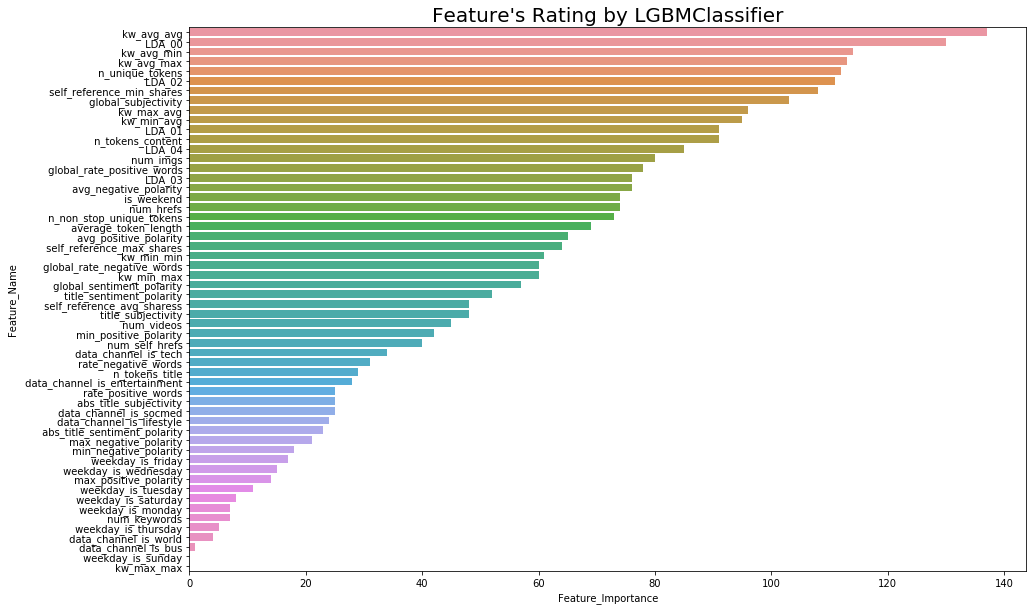

In [433]:
plt.figure(figsize = (15,10))
sns.barplot(important_features_decision['Feature_Importance'], important_features_decision['Feature_Name'])
plt.title('Feature\'s Rating by LGBMClassifier', size = 20)
plt.show()

In [434]:
list2=list(important_features_decision[important_features_decision.Feature_Importance>60].Feature_Name)

In [435]:
new_train=scaled_xtrain[list2]

In [436]:
new_test=scaled_xtest[list2]

In [437]:
def quick_eval(pipeline, new_train, ytrain, new_test, ytest, verbose=True):
   
    pipeline.fit(new_train, ytrain)
    y_test_pred = pipeline.predict(new_test)
    
    acc = accuracy_score(ytest,y_test_pred)
    cohen_score = cohen_kappa_score(ytest,y_test_pred)
    
    if verbose:
        print("----------------------------------------------------------------------------------")
        print(f"Classifier algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
        print()
        print(f"Accuracy Score : {acc}")
        print(f"CohenKappa Score : {cohen_score}")
        print()
    
    return pipeline.named_steps['regressor'], acc, cohen_score
    
regressors = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LGBMClassifier(lambda_l1=10),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    
]

for r in regressors:
    pipe = Pipeline(steps = [
        ('regressor', r)
    ])

    quick_eval(pipe, scaled_xtrain, ytrain, scaled_xtest, ytest)


----------------------------------------------------------------------------------
Classifier algorithm: LogisticRegression

Accuracy Score : 0.6586227192466156
CohenKappa Score : 0.31492699466785934

----------------------------------------------------------------------------------
Classifier algorithm: DecisionTreeClassifier

Accuracy Score : 0.5760531405028168
CohenKappa Score : 0.15051588540589422

----------------------------------------------------------------------------------
Classifier algorithm: RandomForestClassifier

Accuracy Score : 0.6314638863196839
CohenKappa Score : 0.25747547937128834

----------------------------------------------------------------------------------
Classifier algorithm: LGBMClassifier

Accuracy Score : 0.6774573278399059
CohenKappa Score : 0.35339615656522994

----------------------------------------------------------------------------------
Classifier algorithm: AdaBoostClassifier

Accuracy Score : 0.6633313713949383
CohenKappa Score : 0.3251502220